{'Strongly disagree': [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'Somewhat disagree': [1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1], 'Neither agree nor disagree': [3, 0, 2, 3, 1, 1, 3, 0, 3, 0, 2, 0], 'Somewhat agree': [1, 3, 1, 1, 1, 3, 1, 4, 1, 1, 1, 2], 'Strongly agree': [0, 1, 0, 0, 2, 0, 1, 0, 1, 3, 1, 2]}


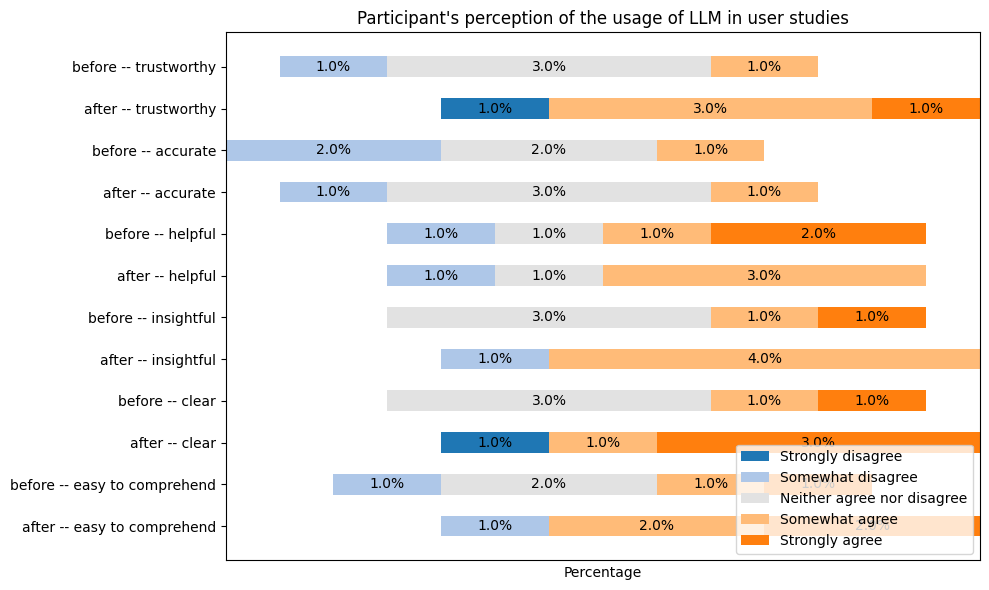

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data: Percentage of responses for each condition and response category
"""
before:
0	0	0	0	0	0
1	2	1	0	0	1
3	2	1	3	3	2
1	1	1	1	1	1
0	0	2	1	1	1

after:
1	0	0	0	1	0
0	1	1	1	0	1
0	3	1	0	0	0
3	1	3	4	1	2
1	0	0	0	3	2
"""
before = [
    [
        0,0,0,0,0,0,
    ],
    [
        1,2,1,0,0,1,
    ],
    [
        3,2,1,3,3,2,
    ],
    [
        1,1,1,1,1,1,
    ],
    [
        0,0,2,1,1,1,
    ],
]

after = [
    [
        1,0,0,0,1,0,
    ],
    [
        0,1,1,1,0,1,
    ],
    [
        0,3,1,0,0,0,
    ],
    [
        3,1,3,4,1,2,
    ],
    [
        1,0,0,0,3,2,
    ],
]

dd = []
for i,j in zip(before, after):
    ddd = []
    for a,b in zip(i,j):
        ddd.append(a)
        ddd.append(b)
    dd.append(ddd)
data = {
    "Strongly disagree": dd[0],
    "Somewhat disagree": dd[1], 
    "Neither agree nor disagree": dd[2],
    "Somewhat agree": dd[3],
    "Strongly agree": dd[4],
}

print(data)
# Index: labels of the rows (e.g., 'Before', 'Synchronous', 'After')

df = pd.DataFrame(
    data,
    index= [
            "before -- trustworthy",
            "after -- trustworthy",
            "before -- accurate",
            "after -- accurate",
            "before -- helpful",
            "after -- helpful",
            "before -- insightful",
            "after -- insightful",
            "before -- clear",
            "after -- clear",
            "before -- easy to comprehend",
            "after -- easy to comprehend",
        ]
)

df = df.iloc[::-1]
# Combine condition and question to create a single index for plotting
# df.index = df.index.map(lambda x: f"{x[0]} - {x[1]}")

bias =     df["Strongly disagree"] \
    + df["Somewhat disagree"] \
   + df["Neither agree nor disagree"] / 2


df_cumsum = df.cumsum(axis=1)

# Plotting the diverging stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set colors for each category
colors = ["#1f77b4", "#aec7e8", "#e2e2e2", "#ffbb78", "#ff7f0e"]

# Cumulative sums for the baseline of each bar segment
# print(df_cumsum)

bars = []
# Plot each segment as a filled bar
for i, col in enumerate(df.columns):
    bar = ax.barh(df.index, df[col], color=colors[i], left=df_cumsum[col] - df[col] - bias, height=0.5)
    bars.append(bar)

    # Add a label to each bar
    for j in range(len(df.index)):
        # The x position for the label should be the center of the bar
        label_x = df_cumsum[col].iloc[j] - (df[col].iloc[j] / 2) - bias.iloc[j]
        # if is zero, then don't show
        if df[col].iloc[j] == 0:
            continue
        # Show label with absolute value for the length of the bar
        ax.text(
            label_x,
            j,
            f"{abs(df[col].iloc[j]):.1f}%",
            va="center",
            ha="center",
            color="black",
        )

# Set labels and title
ax.set_xlabel("Percentage")
ax.set_title("Participant's perception of the usage of LLM in user studies")
# ax.set_yticks([])
# ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
# Add vertical grid lines
# ax.axvline(0, color="black", linewidth=0.5, label="Neutral")

# # Adjust y-ticks
# ax.set_yticks(np.arange(len(df.index)))
# ax.set_yticklabels(df.index)

# Show the legend
ax.legend(bars, df.columns, loc="lower right")

# Show the plot
plt.tight_layout()
plt.savefig("figures/diagram.pdf")
plt.show()


In [65]:
df.iloc[::-1]


Strongly disagree  Somewhat disagree   
after -- easy to comprehend                   0                  1  \
before -- easy to comprehend                  0                  1   
after -- clear                                1                  0   
before -- clear                               0                  0   
after -- insightful                           0                  1   
before -- insightful                          0                  0   
after -- helpful                              0                  1   
before -- helpful                             0                  1   
after -- accurate                             0                  1   
before -- accurate                            0                  2   
after -- trustworthy                          1                  0   
before -- trustworthy                         0                  1   

                              Neither agree nor disagree  Somewhat agree   
after -- easy to comprehend                            0               2  \
before -- easy to comprehend                           2               1   
after -- clear                                         0               1   
before -- clear                                        3               1   
after -- insightful                                    0               4   
before -- insightful                                   3               1   
after -- helpful                                       1               3   
before -- helpful                                      1               1   
after -- accurate                                      3               1   
before -- accurate                                     2               1   
after -- trustworthy                                   0               3   
before -- trustworthy                                  3               1   

                              Strongly agree  
after -- easy to comprehend                2  
before -- easy to comprehend               1  
after -- clear                             3  
before -- clear                            1  
after -- insightful                        0  
before -- insightful                       1  
after -- helpful                           0  
before -- helpful                          2  
after -- accurate                          0  
before -- accurate                         0  
after -- trustworthy                       1  
before -- trustworthy                      0